In [1]:
import os

In [2]:
print(os.getcwd())

C:\Users\choco\Downloads


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# PARTE 1 SOLO EL PUNTO 2 abc
import pandas as pd

print("DATOS DE LA PATAGONIA 2004 y 2024 DE LA ENCUESTA PERMANENTE DE HOGARES (EPH)")


datos1 = pd.read_stata('individual_T104.dta')
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]
matriz1 = patagonia1.iloc[:, :15]


datos2 = pd.read_excel('usu_individual_T124.xlsx')
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]
matriz2 = patagonia2.iloc[:, :15]


print("\nDatos de Patagonia 2004:")
print(matriz1.to_string(index=False, col_space=5))
print("\nDatos de Patagonia 2024:")
print(matriz2.to_string(index=False, col_space=5))
columna_max_faltantes_2004 = matriz1.isnull().sum().idxmax()
max_faltantes_2004 = matriz1.isnull().sum().max()

columna_max_faltantes_2024 = matriz2.isnull().sum().idxmax()
max_faltantes_2024 = matriz2.isnull().sum().max()

print(f"\nLa columna con más valores faltantes en 2004 es {columna_max_faltantes_2004} con {max_faltantes_2004} valores faltantes.")
print(f"La columna con más valores faltantes en 2024 es {columna_max_faltantes_2024} con {max_faltantes_2024} valores faltantes.")


DATOS DE LA PATAGONIA 2004 y 2024 DE LA ENCUESTA PERMANENTE DE HOGARES (EPH)

Datos de Patagonia 2004:
 nro_hogar                    componente   h15   ano4      trimestre     region mas_500                      aglomerado  pondera             ch03  ch04           ch06                  ch07                                                ch08            ch09
       1.0                           1.0    Sí 2004.0 1er. Trimestre Patagónica       N Comodoro Rivadavia - Rada Tilly    150.0             Jefe Varón           34.0 Separado o divorciado                            No paga ni le descuentan              Sí
       1.0                           1.0    Sí 2004.0 1er. Trimestre Patagónica       N Comodoro Rivadavia - Rada Tilly    120.0             Jefe Varón           62.0                Casado                            No paga ni le descuentan              Sí
       1.0                           2.0    Sí 2004.0 1er. Trimestre Patagónica       N Comodoro Rivadavia - Rada Tilly    120

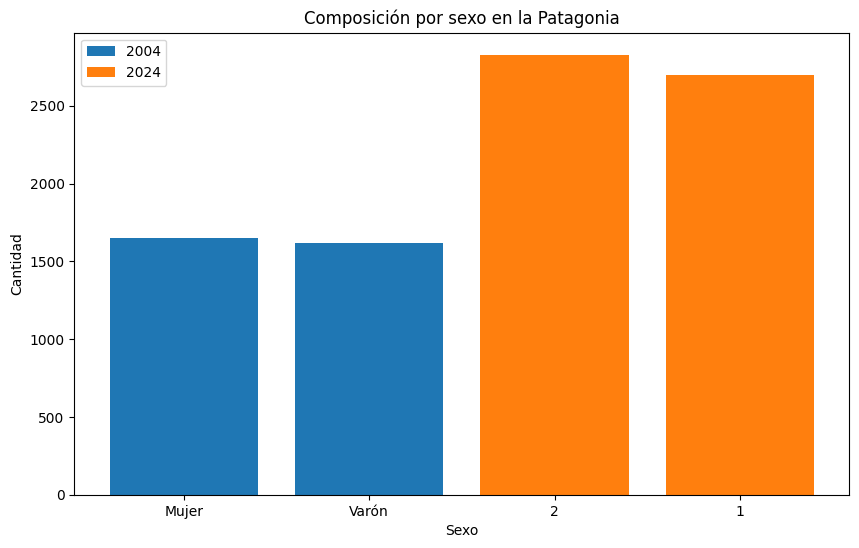

In [6]:
#PARTE2  EJERCICIO 3
import pandas as pd
import matplotlib.pyplot as plt


datos1 = pd.read_stata('individual_T104.dta')
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]


datos2 = pd.read_excel('usu_individual_T124.xlsx')
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]


sexo_2004 = patagonia1['ch04'].value_counts()
sexo_2024 = patagonia2['CH04'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(sexo_2004.index.astype(str), sexo_2004.values, label='2004')
plt.bar(sexo_2024.index.astype(str), sexo_2024.values, label='2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Composición por sexo en la Patagonia')
plt.legend()
plt.show()

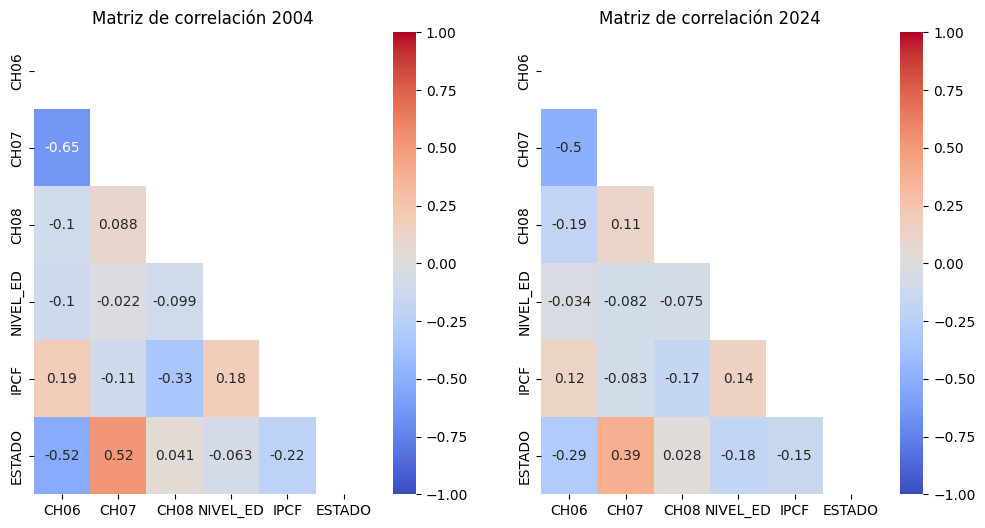

In [7]:
#PARTE2 EJERCICIO 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datos1 = pd.read_stata('individual_T104.dta')
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]
datos2 = pd.read_excel('usu_individual_T124.xlsx')
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]

patagonia1 = patagonia1.rename(columns={'ch04': 'CH04', 'ch06': 'CH06', 'ch07': 'CH07', 'ch08': 'CH08', 'nivel_ed': 'NIVEL_ED', 
                                        'cat_inac': 'CAT_INAC', 'ipcf': 'IPCF', 'estado': 'ESTADO'})
patagonia2 = patagonia2.rename(columns={'CH04': 'CH04', 'CH06': 'CH06', 'CH07': 'CH07', 'CH08': 'CH08', 'nivel_ed': 'NIVEL_ED', 
                                        'cat_inac': 'CAT_INAC', 'ipcf': 'IPCF', 'estado': 'ESTADO'})


patagonia1['CH04'] = pd.Categorical(patagonia1['CH04']).codes
patagonia2['CH04'] = pd.Categorical(patagonia2['CH04']).codes

patagonia1['CH06'] = pd.Categorical(patagonia1['CH06']).codes
patagonia2['CH06'] = pd.Categorical(patagonia2['CH06']).codes

patagonia1['CH07'] = pd.Categorical(patagonia1['CH07']).codes
patagonia2['CH07'] = pd.Categorical(patagonia2['CH07']).codes

patagonia1['CH08'] = pd.Categorical(patagonia1['CH08']).codes
patagonia2['CH08'] = pd.Categorical(patagonia2['CH08']).codes

patagonia1['NIVEL_ED'] = pd.Categorical(patagonia1['NIVEL_ED']).codes
patagonia2['NIVEL_ED'] = pd.Categorical(patagonia2['NIVEL_ED']).codes

patagonia1['CAT_INAC'] = pd.Categorical(patagonia1['CAT_INAC']).codes
patagonia2['CAT_INAC'] = pd.Categorical(patagonia2['CAT_INAC']).codes

patagonia1['ESTADO'] = pd.Categorical(patagonia1['ESTADO']).codes
patagonia2['ESTADO'] = pd.Categorical(patagonia2['ESTADO']).codes

variables_numericas = ['CH06', 'CH07', 'CH08', 'NIVEL_ED', 'IPCF', 'ESTADO']

corr_2004 = patagonia1[variables_numericas].corr()
corr_2024 = patagonia2[variables_numericas].corr()

upp_mat_2004 = np.triu(corr_2004)
upp_mat_2024 = np.triu(corr_2024)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(corr_2004, vmin=-1, vmax=+1, annot=True, cmap="coolwarm", mask=upp_mat_2004)
plt.title('Matriz de correlación 2004')
plt.subplot(1, 2, 2)
sns.heatmap(corr_2024, vmin=-1, vmax=+1, annot=True, cmap="coolwarm", mask=upp_mat_2024)
plt.title('Matriz de correlación 2024')
plt.show()


Desocupados 2004: 0
Inactivos 2004: 0
Desocupados 2024: 115
Inactivos 2024: 3001
Media IPCF 2004:
ESTADO
Ocupado             551.186902
Desocupado          225.452935
Inactivo            364.990445
Menor de 10 años    297.985339
Name: IPCF, dtype: float64
Media IPCF 2024:
ESTADO
0         0.000000
1    273633.945372
2    116234.228957
3    192800.433275
4    162674.792019
Name: IPCF, dtype: float64


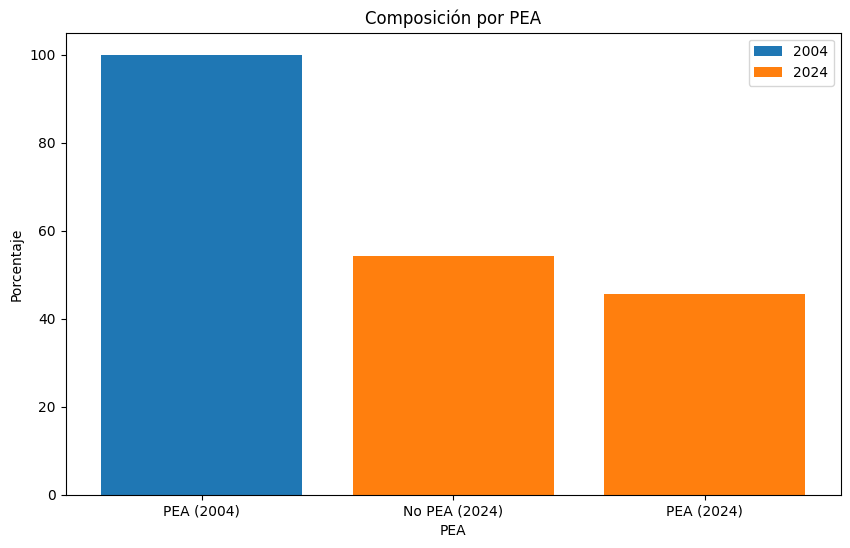

In [8]:
# PARTE 3 EJRCICIO 5 6 7
import pandas as pd
import matplotlib.pyplot as plt


datos1 = pd.read_stata('individual_T104.dta')
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]
datos2 = pd.read_excel('usu_individual_T124.xlsx')
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]


patagonia1 = patagonia1.rename(columns={'estado': 'ESTADO', 'ipcf': 'IPCF'})
patagonia2 = patagonia2.rename(columns={'estado': 'ESTADO', 'ipcf': 'IPCF'})


desocupados_2004 = patagonia1[patagonia1['ESTADO'] == 2].shape[0]
inactivos_2004 = patagonia1[(patagonia1['ESTADO'] == 3) | (patagonia1['ESTADO'] == 4)].shape[0]

desocupados_2024 = patagonia2[patagonia2['ESTADO'] == 2].shape[0]
inactivos_2024 = patagonia2[(patagonia2['ESTADO'] == 3) | (patagonia2['ESTADO'] == 4)].shape[0]

print("Desocupados 2004:", desocupados_2004)
print("Inactivos 2004:", inactivos_2004)
print("Desocupados 2024:", desocupados_2024)
print("Inactivos 2024:", inactivos_2024)


media_ipcf_2004 = patagonia1.groupby('ESTADO', observed=True)['IPCF'].mean()
media_ipcf_2024 = patagonia2.groupby('ESTADO', observed=True)['IPCF'].mean()

print("Media IPCF 2004:")
print(media_ipcf_2004)
print("Media IPCF 2024:")
print(media_ipcf_2024)


respondieron_2004 = patagonia1[patagonia1['ESTADO'] != 0].copy()
respondieron_2024 = patagonia2[patagonia2['ESTADO'] != 0].copy()

respondieron_2004.to_csv('respondieron_2004.csv', index=False)
respondieron_2024.to_csv('respondieron_2024.csv', index=False)

norespondieron_2004 = patagonia1[patagonia1['ESTADO'] == 0]
norespondieron_2024 = patagonia2[patagonia2['ESTADO'] == 0]

norespondieron_2004.to_csv('norespondieron_2004.csv', index=False)
norespondieron_2024.to_csv('norespondieron_2024.csv', index=False)


respondieron_2004['PEA'] = respondieron_2004['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
respondieron_2024['PEA'] = respondieron_2024['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


pea_2004 = respondieron_2004['PEA'].value_counts(normalize=True) * 100
pea_2024 = respondieron_2024['PEA'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
if len(pea_2004) > 1:
    plt.bar(['No PEA (2004)', 'PEA (2004)'], [pea_2004.iloc[0], pea_2004.iloc[1]], label='2004')
else:
    plt.bar(['PEA (2004)'], [pea_2004.iloc[0]], label='2004')

if len(pea_2024) > 1:
    plt.bar(['No PEA (2024)', 'PEA (2024)'], [pea_2024.iloc[0], pea_2024.iloc[1]], label='2024')
else:
    plt.bar(['PEA (2024)'], [pea_2024.iloc[0]], label='2024')

plt.xlabel('PEA')
plt.ylabel('Porcentaje')
plt.title('Composición por PEA')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

datos1 = pd.read_stata('individual_T104.dta')
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]
datos2 = pd.read_excel('usu_individual_T124.xlsx')
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]

patagonia1 = patagonia1.rename(columns={'estado': 'ESTADO', 'ipcf': 'IPCF'})
patagonia2 = patagonia2.rename(columns={'estado': 'ESTADO', 'ipcf': 'IPCF'})

desocupados_2004 = patagonia1[patagonia1['ESTADO'] == 2].shape[0]
inactivos_2004 = patagonia1[(patagonia1['ESTADO'] == 3) | (patagonia1['ESTADO'] == 4)].shape[0]
desocupados_2024 = patagonia2[patagonia2['ESTADO'] == 2].shape[0]
inactivos_2024 = patagonia2[(patagonia2['ESTADO'] == 3) | (patagonia2['ESTADO'] == 4)].shape[0]

print("Desocupados 2004:", desocupados_2004)
print("Inactivos 2004:", inactivos_2004)
print("Desocupados 2024:", desocupados_2024)
print("Inactivos 2024:", inactivos_2024)

media_ipcf_2004 = patagonia1.groupby('ESTADO', observed=True)['IPCF'].mean()
media_ipcf_2024 = patagonia2.groupby('ESTADO', observed=True)['IPCF'].mean()

print("Media IPCF 2004:")
print(media_ipcf_2004)
print("Media IPCF 2024:")
print(media_ipcf_2024)

respondieron_2004 = patagonia1[patagonia1['ESTADO'] != 0].copy()
respondieron_2024 = patagonia2[patagonia2['ESTADO'] != 0].copy()

respondieron_2004.to_csv('respondieron_2004.csv', index=False)
respondieron_2024.to_csv('respondieron_2024.csv', index=False)

norespondieron_2004 = patagonia1[patagonia1['ESTADO'] == 0]
norespondieron_2024 = patagonia2[patagonia2['ESTADO'] == 0]

norespondieron_2004.to_csv('norespondieron_2004.csv', index=False)
norespondieron_2024.to_csv('norespondieron_2024.csv', index=False)

respondieron_2004['PEA'] = respondieron_2004['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
respondieron_2024['PEA'] = respondieron_2024['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)

respondieron_2004['edad'] = pd.to_numeric(respondieron_2004['ch04'], errors='coerce')
respondieron_2024['edad'] = pd.to_numeric(respondieron_2024['CH04'], errors='coerce')

respondieron_2004 = respondieron_2004.dropna(subset=['edad'])
respondieron_2024 = respondieron_2024.dropna(subset=['edad'])

respondieron_2004['PET'] = respondieron_2004['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
respondieron_2024['PET'] = respondieron_2024['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

pea_2004 = respondieron_2004['PEA'].value_counts(normalize=True) * 100
pet_2004 = respondieron_2004['PET'].value_counts(normalize=True) * 100
pea_2024 = respondieron_2024['PEA'].value_counts(normalize=True) * 100
pet_2024 = respondieron_2024['PET'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
if 0 in pea_2004.index and 1 in pea_2004.index:
    plt.bar(['No PEA', 'PEA'], [pea_2004[0], pea_2004[1]])
elif 0 in pea_2004.index:
    plt.bar(['No PEA'], [pea_2004[0]])
elif 1 in pea_2004.index:
    plt.bar(['PEA'], [pea_2004[1]])

plt.xlabel('PEA')
plt.ylabel('Porcentaje')
plt.title('Composición por PEA en 2004')

plt.subplot(1, 2, 2)
plt.bar(['No PEA', 'PEA'], [pea_2024.get(0, 0), pea_2024.get(1, 0)])
plt.xlabel('PEA')
plt.ylabel('Porcentaje')
plt.title('Composición por PEA en 2024')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
if 0 in pet_2004.index and 1 in pet_2004.index:
    plt.bar(['Fuera de PET', 'PET'], [pet_2004[0], pet_2004[1]])
elif 0 in pet_2004.index:
    plt.bar(['Fuera de PET'], [pet_2004[0]])
elif 1 in pet_2004.index:
    plt.bar(['PET'], [pet_2004[1]])

plt.xlabel('PET')
plt.ylabel('Porcentaje')
plt.title('Composición por PET en 2004')

plt.subplot(1, 2, 2)
plt.bar(['Fuera de PET', 'PET'], [pet_2024.get(0, 0), pet_2024.get(1, 0)])
plt.xlabel('PET')
plt.ylabel('Porcentaje')
plt.title('Composición por PET en 2024')

plt.tight_layout()
plt.show()

